In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-11 00:00:56,673 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-11 00:00:56,675 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-11 00:00:56,676 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-11 00:00:56,676 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-11 00:00:56,677 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def spec(ray_, lmin, lmax,ins, num, dlam=0.001, dlam2=0.00997,col='deeppink', line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    sg2 = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam2)

    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg2.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg2.make_spectrum(ray, lines=[DIY_line])
        sg2.save_spectrum('spec2.txt')



    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg2.make_spectrum(ray, lines=[line])
        sg2.save_spectrum('spec2.txt')



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec2.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]

    tog = np.array([lam, flux, lam2, flux2])
    arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))

    fig = plt.figure(figsize=(15, 5))
    

    plt.step(tog[2], tog[3], color='dimgrey', label=ins, linewidth=2.2, where='mid')
    plt.plot(tog[0], tog[1], color=col, label= 'd$\lambda$= ' +str(dlam), alpha=0.8)
        
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
    
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    plt.xlim(lmin, lmax)

In [6]:
def spec_extra(ray_, lmin, lmax, dlam=0.0803, line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    
    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
    


    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    

    tog = np.array([lam, flux])
    
    return tog

In [7]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)

yt : [INFO     ] 2022-07-11 00:04:06,320 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-11 00:04:06,323 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-07-11 00:04:06,972 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-07-11 00:04:07,052 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-11 00:04:07,052 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-11 00:04:07,052 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-11 00:04:07,053 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

# Ly a

yt : [INFO     ] 2022-07-11 00:04:08,471 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:08,475 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:08,483 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:04:08,487 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-11 00:04:08,573 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:08,586 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 146.93it/s]
yt : [INFO     ] 2022-07-11 00:04:10,363 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-11 00:04:10,364 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:10,462 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 821.64it/s] 
yt : [INFO     ] 2022-07-11 00:04:10,802 Not adding continuum Ly C: insufficient col

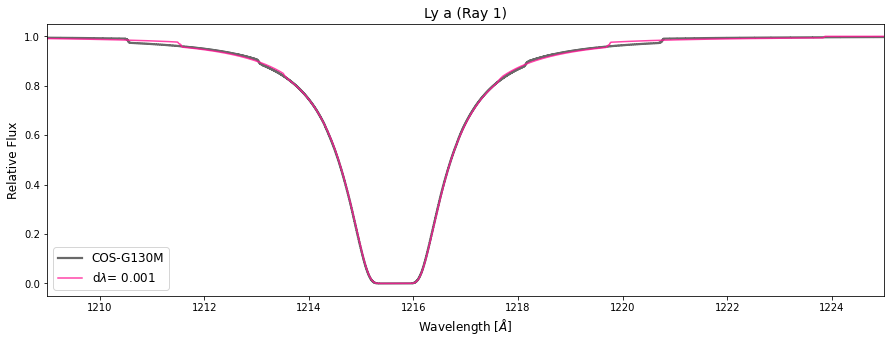

In [8]:
spec(ray_=ray1, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:11,191 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:11,193 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:11,202 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:04:11,206 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-11 00:04:11,292 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:11,297 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 577.05it/s] 
yt : [INFO     ] 2022-07-11 00:04:11,773 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-11 00:04:11,773 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:11,871 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2622.52it/s]
yt : [INFO     ] 2022-07-11 00:04:11,996 Not adding continuum Ly C: insufficient co

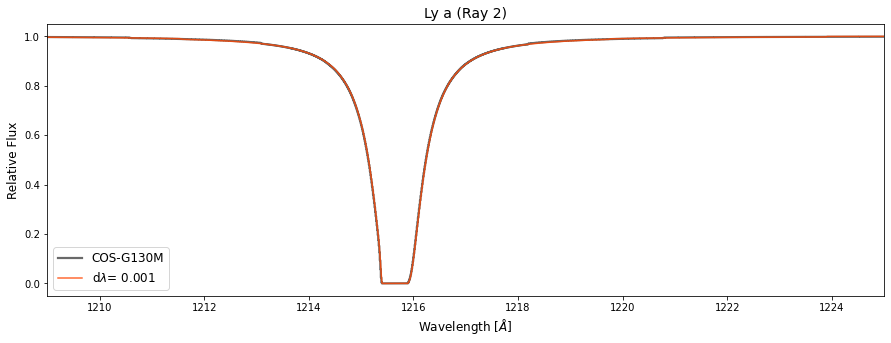

In [9]:
spec(ray_=ray2, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:12,212 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:12,215 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:12,224 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-11 00:04:12,228 Identified 1.210e+02 octs
yt : [INFO     ] 2022-07-11 00:04:12,312 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:12,315 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:09<00:00, 27.61it/s] 
yt : [INFO     ] 2022-07-11 00:04:21,618 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-07-11 00:04:21,619 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:22,569 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1318.24it/s]
yt : [INFO     ] 2022-07-11 00:04:22,790 Not adding continuum Ly C: insufficient col

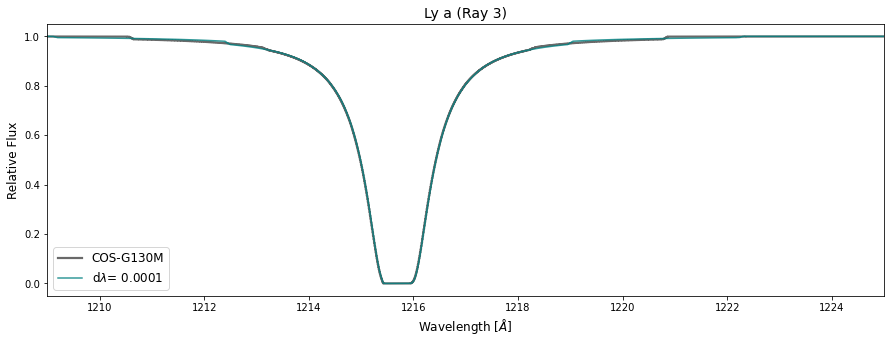

In [10]:
spec(ray_=ray3, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='3', dlam=0.0001, col='teal')

# Si 1526

yt : [INFO     ] 2022-07-11 00:04:23,727 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:23,731 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:23,733 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:23,770 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2934.46it/s]
yt : [INFO     ] 2022-07-11 00:04:23,892 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:23,918 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6868.08it/s]
yt : [INFO     ] 2022-07-11 00:04:23,984 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

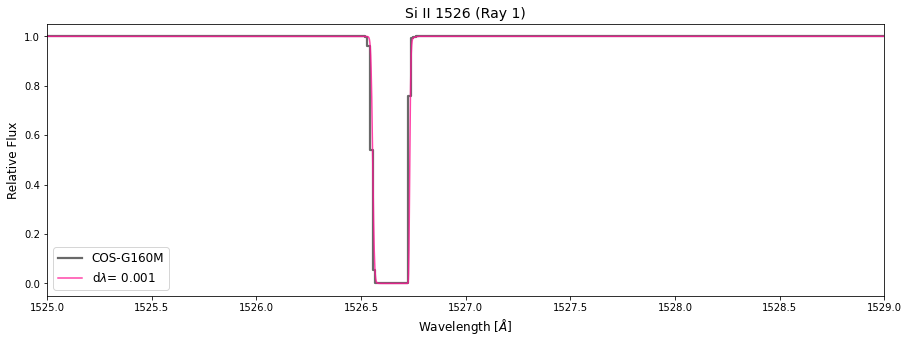

In [11]:
spec(ray1, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-07-11 00:04:24,122 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,126 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,130 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2896.29it/s]
yt : [INFO     ] 2022-07-11 00:04:24,250 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:24,258 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6880.80it/s]
yt : [INFO     ] 2022-07-11 00:04:24,325 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


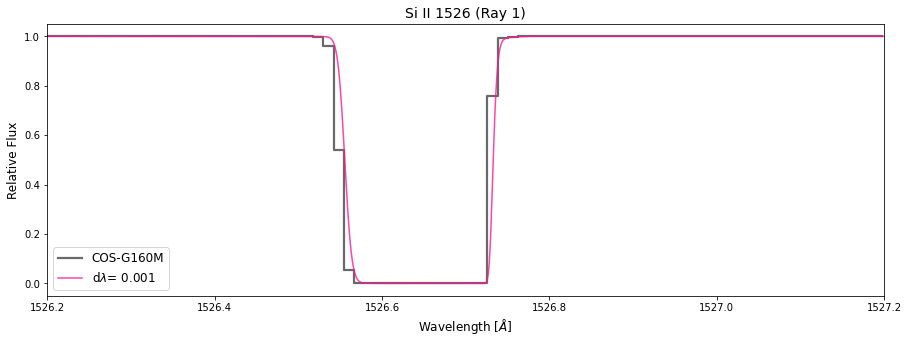

In [12]:
spec(ray1, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-07-11 00:04:24,442 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,446 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,509 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:24,513 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10913.12it/s]
yt : [INFO     ] 2022-07-11 00:04:24,566 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:24,593 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17582.44it/s]
yt : [INFO     ] 2022-07-11 00:04:24,636 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

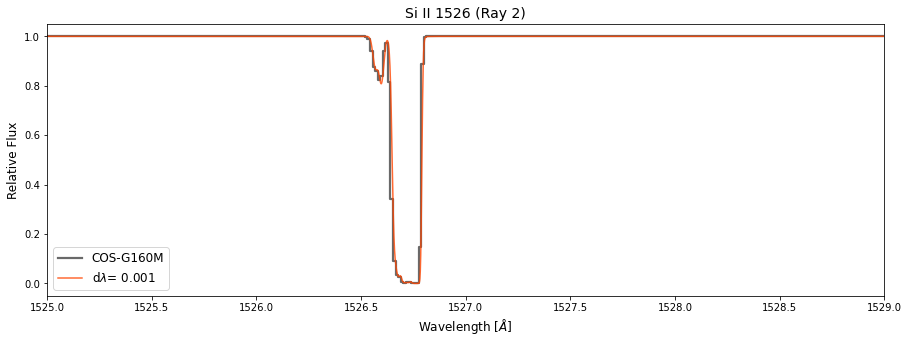

In [13]:
spec(ray2, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:24,781 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,785 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:24,788 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10081.99it/s]
yt : [INFO     ] 2022-07-11 00:04:24,844 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:24,853 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17350.04it/s]
yt : [INFO     ] 2022-07-11 00:04:24,897 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


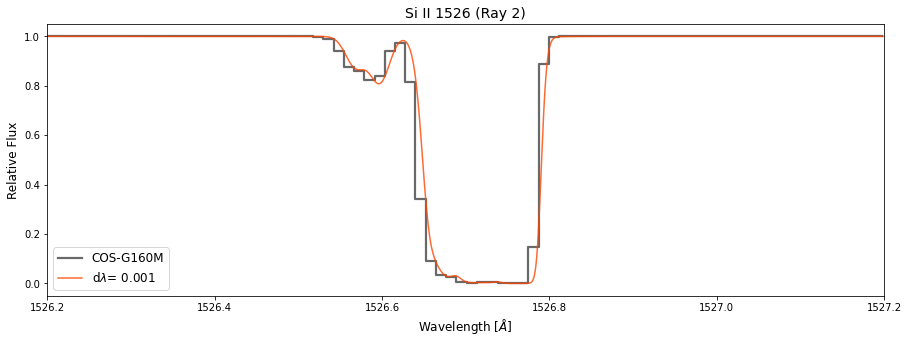

In [14]:
spec(ray2, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:25,016 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,021 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,024 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:25,027 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4796.36it/s]
yt : [INFO     ] 2022-07-11 00:04:25,115 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:25,142 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10353.11it/s]
yt : [INFO     ] 2022-07-11 00:04:25,196 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

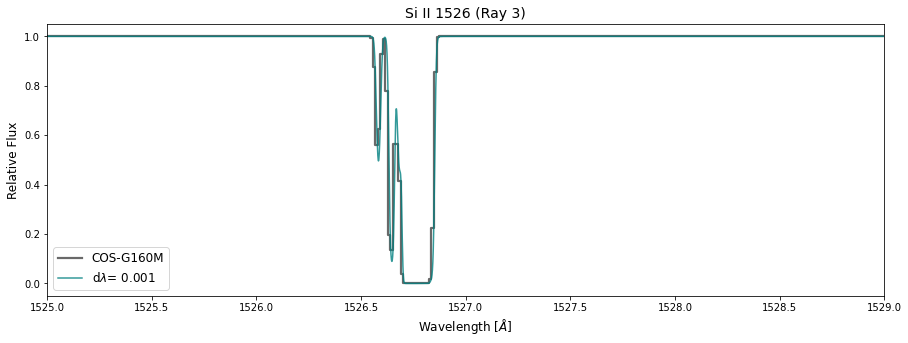

In [15]:
spec(ray3, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

yt : [INFO     ] 2022-07-11 00:04:25,339 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,342 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,346 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4751.83it/s]
yt : [INFO     ] 2022-07-11 00:04:25,431 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:25,440 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10434.91it/s]
yt : [INFO     ] 2022-07-11 00:04:25,495 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


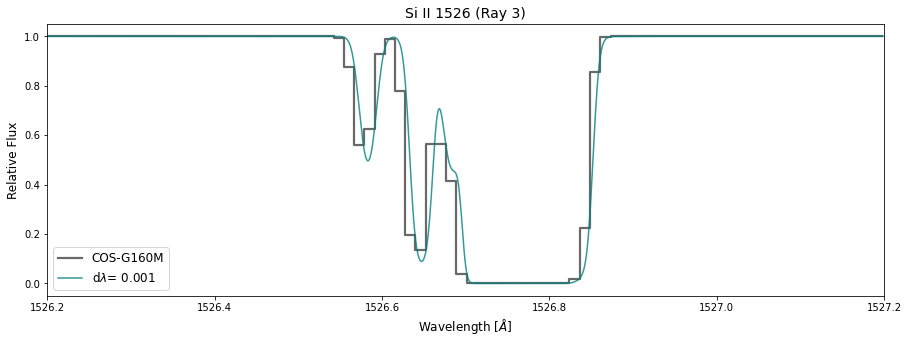

In [16]:
spec(ray3, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

# Si III 1206

yt : [INFO     ] 2022-07-11 00:04:25,615 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,619 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:25,622 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:25,644 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2882.46it/s]
yt : [INFO     ] 2022-07-11 00:04:25,847 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:25,873 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:25,901 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5634.01it/s]
yt : [INFO     ] 2022-07-11 00:04:25,948 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5521.06it/s]
yt : [INFO     ] 2022-07-11 00:

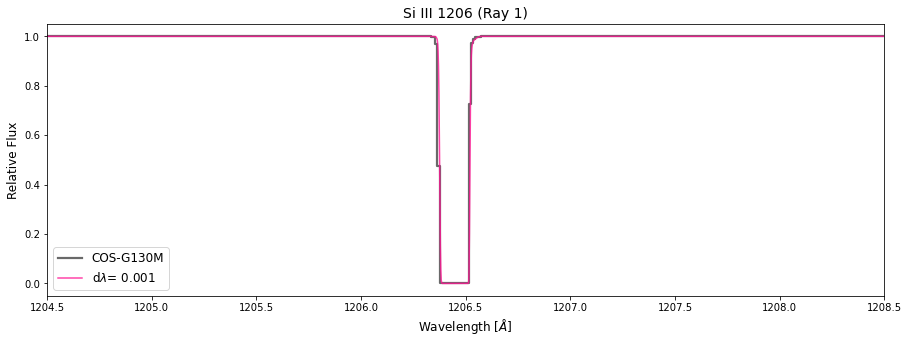

In [17]:
spec(ray1, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:26,136 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,139 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,142 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2927.55it/s]
yt : [INFO     ] 2022-07-11 00:04:26,345 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:26,352 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:26,380 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5623.63it/s]
yt : [INFO     ] 2022-07-11 00:04:26,427 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5482.47it/s]
yt : [INFO     ] 2022-07-11 00:04:26,475 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Cr

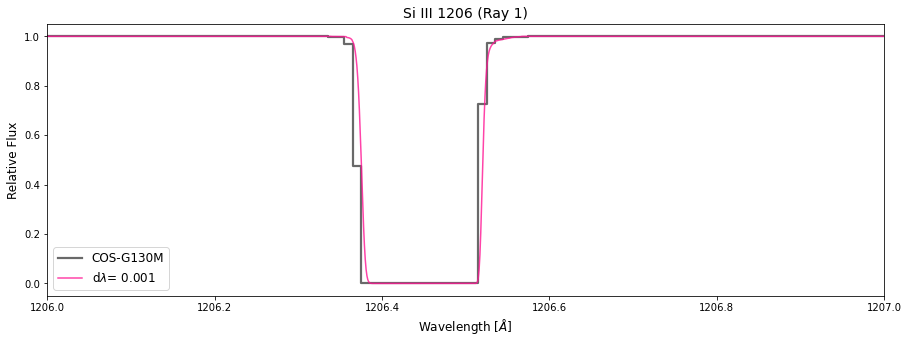

In [18]:
spec(ray1, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:26,590 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,593 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,596 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:26,599 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9197.33it/s]
yt : [INFO     ] 2022-07-11 00:04:26,686 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:26,712 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:26,739 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13896.33it/s]
yt : [INFO     ] 2022-07-11 00:04:26,759 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13823.70it/s]
yt : [INFO     ] 2022-07-11 0

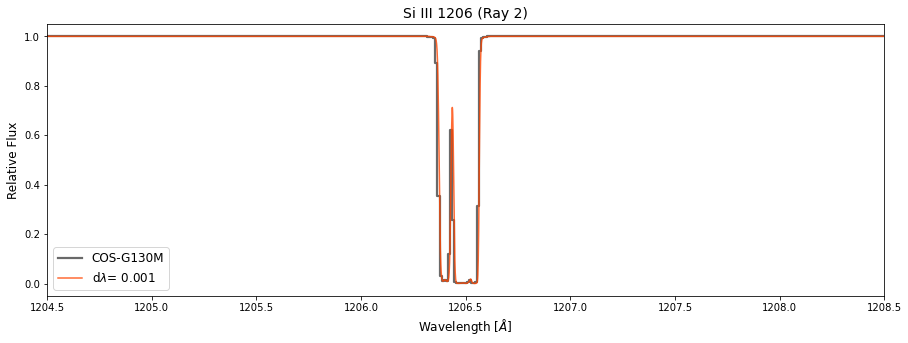

In [19]:
spec(ray2, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:26,921 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,924 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:26,928 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:26,930 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4793.11it/s]
yt : [INFO     ] 2022-07-11 00:04:27,065 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:27,085 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:27,113 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8320.10it/s]
yt : [INFO     ] 2022-07-11 00:04:27,145 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8131.39it/s]
yt : [INFO     ] 2022-07-11 00:

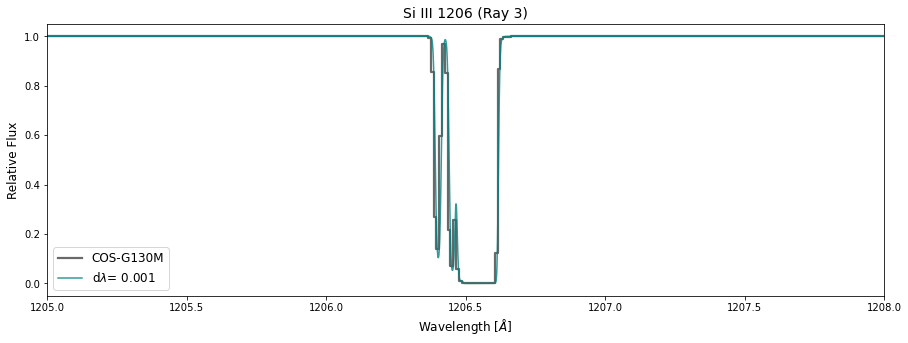

In [20]:
spec(ray3, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-07-11 00:04:27,316 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:27,319 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:27,323 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4696.56it/s]
yt : [INFO     ] 2022-07-11 00:04:27,458 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:27,466 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:27,494 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8414.38it/s]
yt : [INFO     ] 2022-07-11 00:04:27,526 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8094.85it/s]
yt : [INFO     ] 2022-07-11 00:04:27,559 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Cr

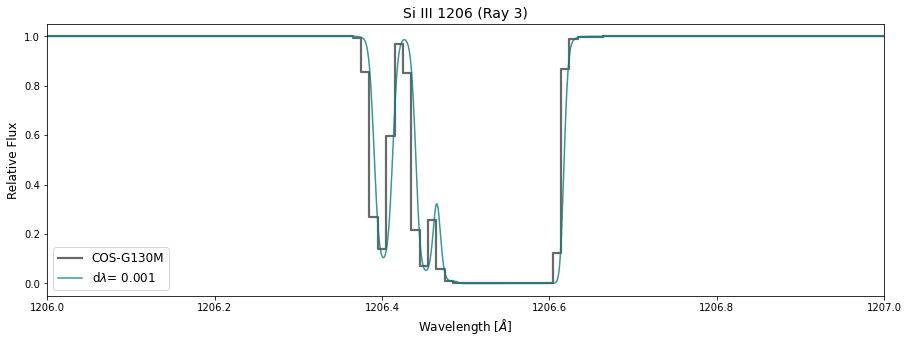

In [21]:
spec(ray3, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

# Si IV 1393

yt : [INFO     ] 2022-07-11 00:04:27,675 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:27,679 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:27,682 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:27,703 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3777.83it/s]
yt : [INFO     ] 2022-07-11 00:04:27,802 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:27,827 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7347.65it/s]
yt : [INFO     ] 2022-07-11 00:04:27,891 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

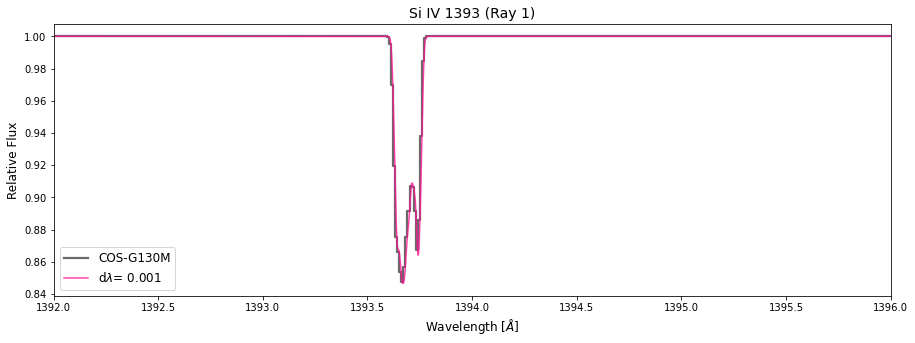

In [22]:
spec(ray1, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:28,039 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,042 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,046 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:28,050 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10913.56it/s]
yt : [INFO     ] 2022-07-11 00:04:28,102 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:28,129 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16393.51it/s]
yt : [INFO     ] 2022-07-11 00:04:28,173 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

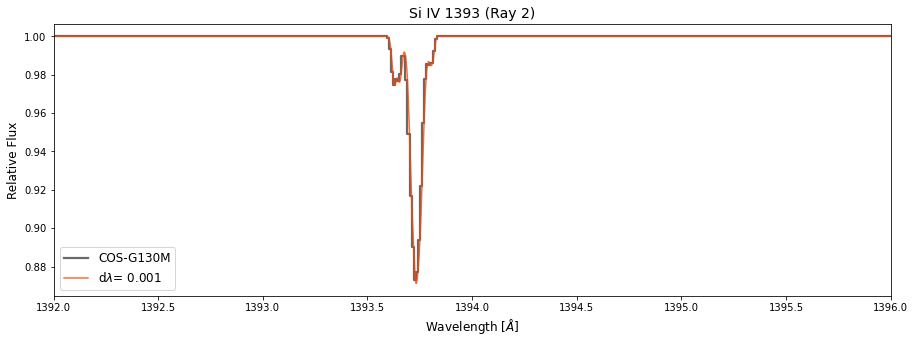

In [23]:
spec(ray2, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:28,321 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,324 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,326 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:28,330 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5365.41it/s]
yt : [INFO     ] 2022-07-11 00:04:28,410 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:28,436 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10733.34it/s]
yt : [INFO     ] 2022-07-11 00:04:28,489 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

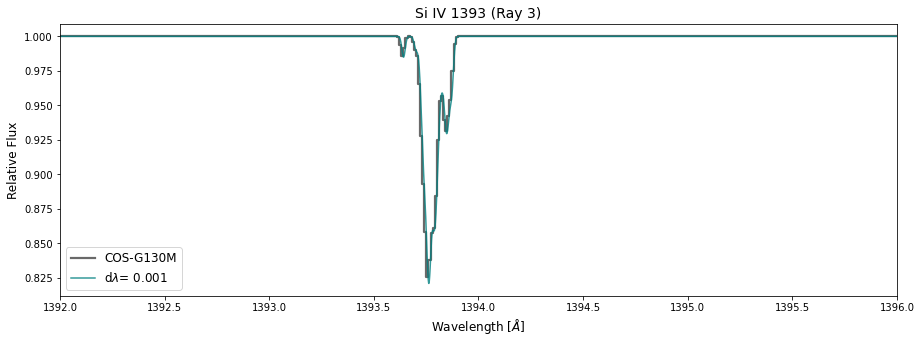

In [24]:
spec(ray3, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C II 1334

yt : [INFO     ] 2022-07-11 00:04:28,636 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,639 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:28,642 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:28,660 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2840.43it/s]
yt : [INFO     ] 2022-07-11 00:04:28,781 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:28,807 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5479.23it/s]
yt : [INFO     ] 2022-07-11 00:04:28,882 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

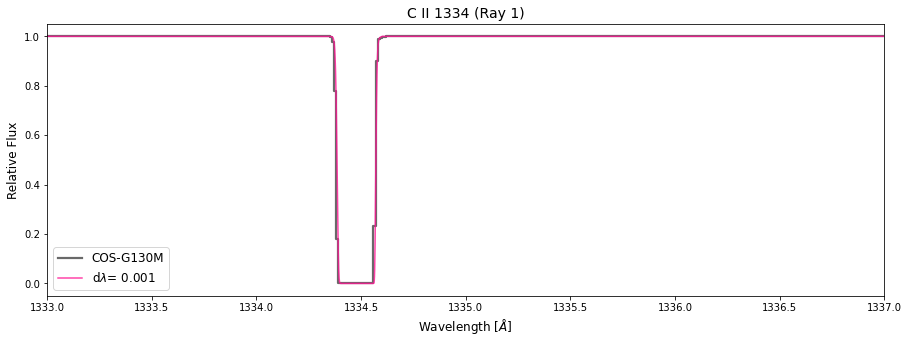

In [25]:
spec(ray1, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:29,021 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,025 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,028 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:29,031 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10062.15it/s]
yt : [INFO     ] 2022-07-11 00:04:29,086 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:29,112 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14880.22it/s]
yt : [INFO     ] 2022-07-11 00:04:29,158 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=o

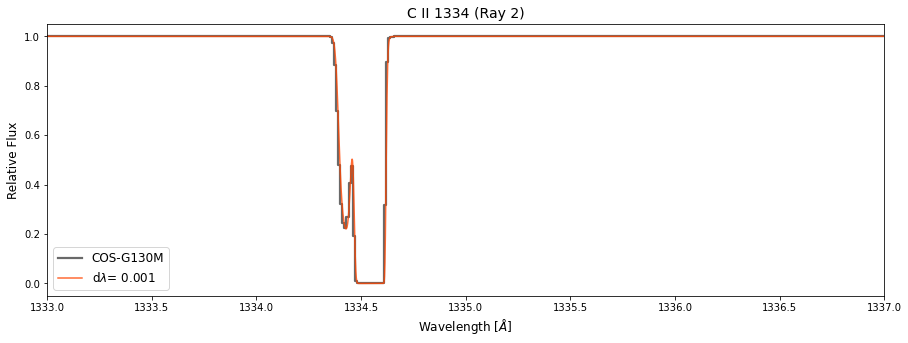

In [26]:
spec(ray2, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:29,303 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,307 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,311 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:29,314 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4352.26it/s]
yt : [INFO     ] 2022-07-11 00:04:29,404 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:29,430 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8457.26it/s]
yt : [INFO     ] 2022-07-11 00:04:29,489 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

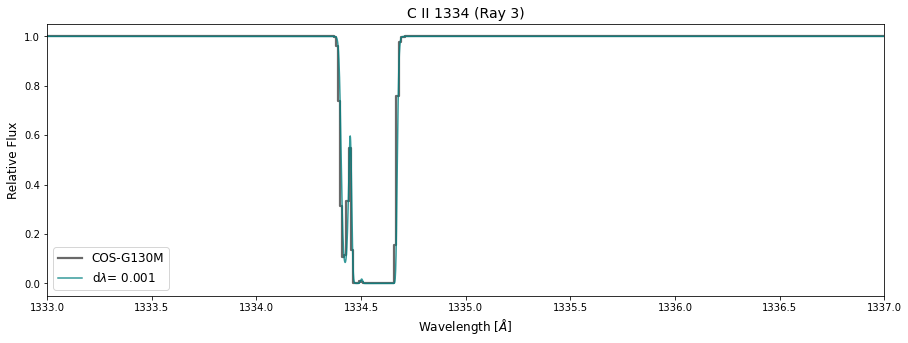

In [27]:
spec(ray3, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C III 977

yt : [INFO     ] 2022-07-11 00:04:29,630 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,634 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:29,637 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:29,650 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2854.38it/s]
yt : [INFO     ] 2022-07-11 00:04:29,860 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:29,885 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5402.09it/s]
yt : [INFO     ] 2022-07-11 00:04:30,008 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

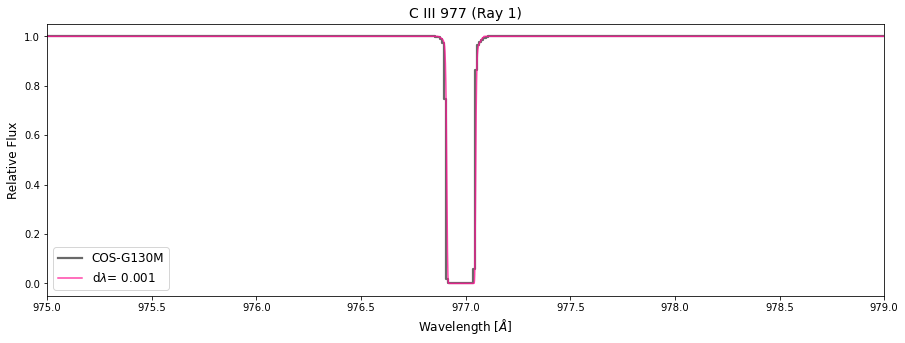

In [28]:
spec(ray1, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='1')


yt : [INFO     ] 2022-07-11 00:04:30,202 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,205 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,208 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:30,211 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8601.56it/s]
yt : [INFO     ] 2022-07-11 00:04:30,300 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:30,326 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 13200.01it/s]
yt : [INFO     ] 2022-07-11 00:04:30,395 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

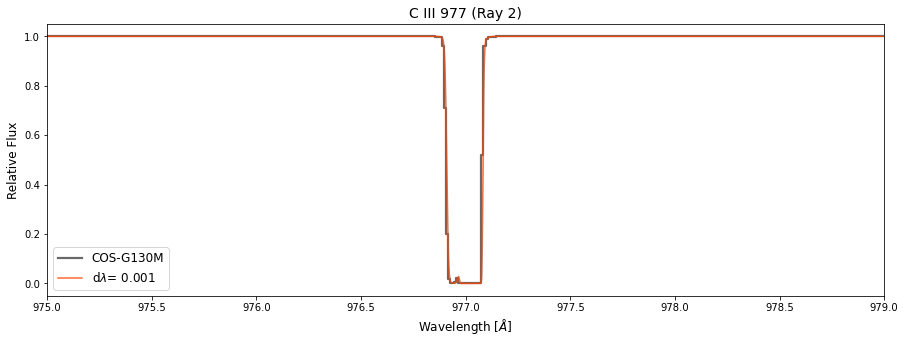

In [29]:
spec(ray2, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:30,538 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,542 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,545 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:30,548 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4455.58it/s]
yt : [INFO     ] 2022-07-11 00:04:30,694 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:30,720 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 7662.85it/s]
yt : [INFO     ] 2022-07-11 00:04:30,815 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

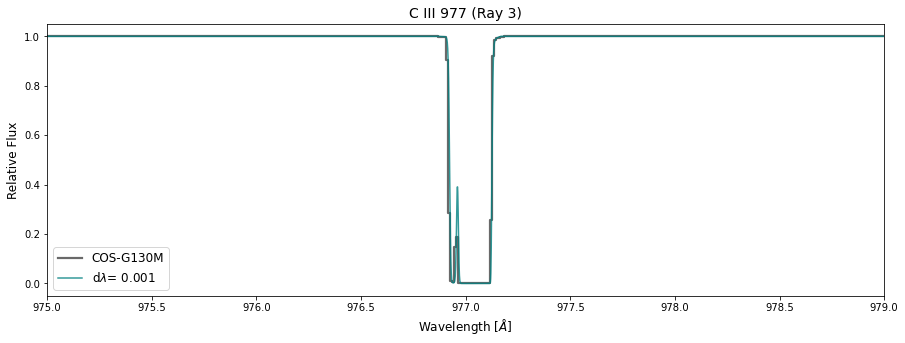

In [30]:
spec(ray3, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C IV 1548

yt : [INFO     ] 2022-07-11 00:04:30,956 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,959 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:30,962 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:30,974 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5837.96it/s]
yt : [INFO     ] 2022-07-11 00:04:31,048 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:31,068 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:31,096 79 out of 256 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5991.53it/s]
yt : [INFO     ] 2022-07-11 00:04:31,140 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

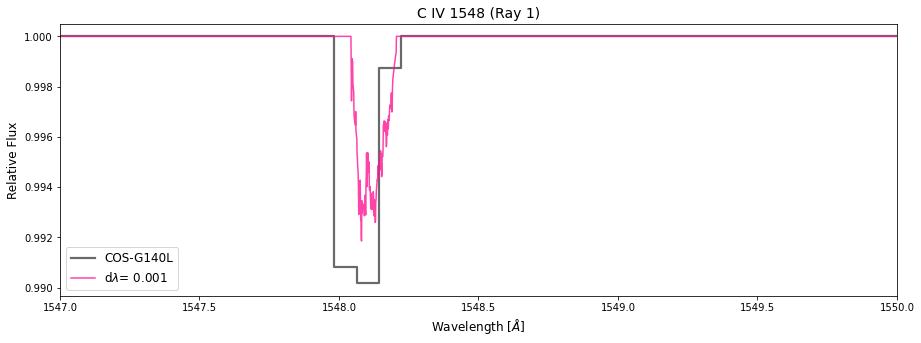

In [31]:
spec(ray1, 1547,1550, line='C IV 1548', dlam2=0.0803, ins='COS-G140L', num='1')

yt : [INFO     ] 2022-07-11 00:04:31,273 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,276 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,279 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:31,282 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5603.82it/s]
yt : [INFO     ] 2022-07-11 00:04:31,358 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:31,378 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6490.42it/s]
yt : [INFO     ] 2022-07-11 00:04:31,446 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

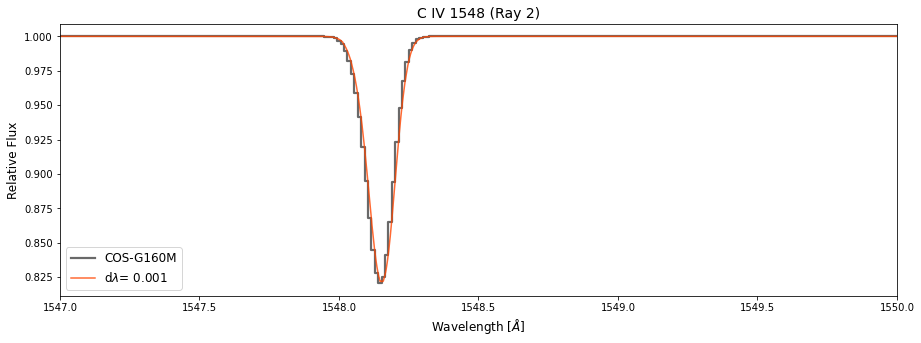

In [32]:
spec(ray2, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:31,582 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,585 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,587 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:31,590 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5755.38it/s]
yt : [INFO     ] 2022-07-11 00:04:31,663 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:31,683 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6249.99it/s]
yt : [INFO     ] 2022-07-11 00:04:31,752 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

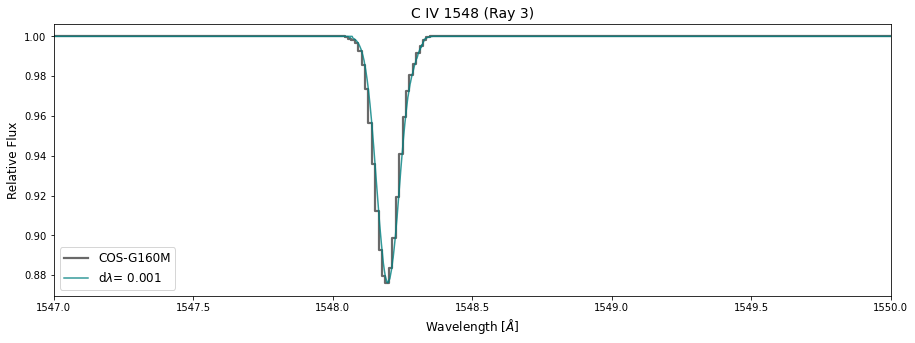

In [33]:
spec(ray3, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='3', col='teal')

# O I 1302

yt : [INFO     ] 2022-07-11 00:04:31,884 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,888 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:31,890 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:31,911 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2848.47it/s]
yt : [INFO     ] 2022-07-11 00:04:32,030 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:32,056 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5885.32it/s]
yt : [INFO     ] 2022-07-11 00:04:32,128 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

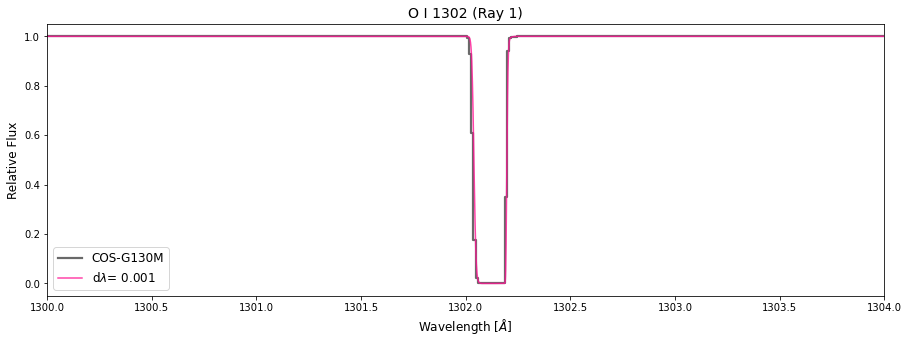

In [34]:
spec(ray1, 1300, 1304, line='O I 1302', ins='COS-G130M', num='1')

yt : [INFO     ] 2022-07-11 00:04:32,270 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,274 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,277 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:32,280 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11044.00it/s]
yt : [INFO     ] 2022-07-11 00:04:32,334 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:32,360 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16977.23it/s]
yt : [INFO     ] 2022-07-11 00:04:32,404 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

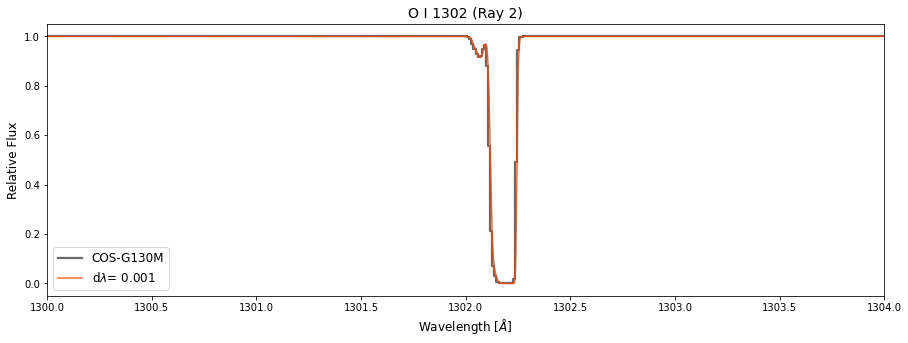

In [35]:
spec(ray2, 1300, 1304, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:32,545 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,548 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,551 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10470.32it/s]
yt : [INFO     ] 2022-07-11 00:04:32,604 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:32,612 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15840.64it/s]
yt : [INFO     ] 2022-07-11 00:04:32,658 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


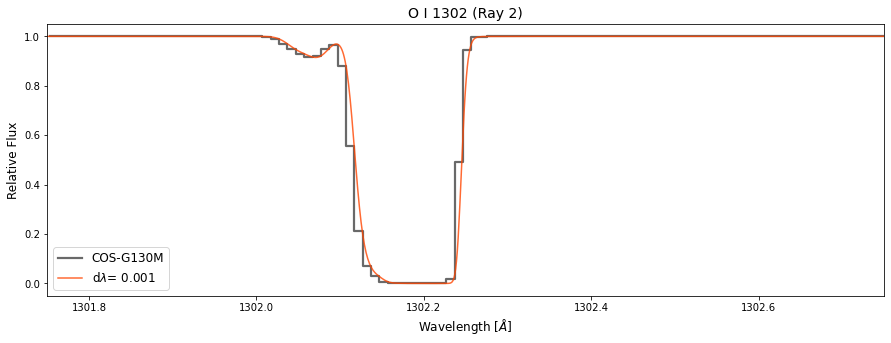

In [36]:
spec(ray2, 1301.75, 1302.75, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:32,775 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,779 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:32,782 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:32,785 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4948.67it/s]
yt : [INFO     ] 2022-07-11 00:04:32,869 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:32,895 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9020.39it/s]
yt : [INFO     ] 2022-07-11 00:04:32,952 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

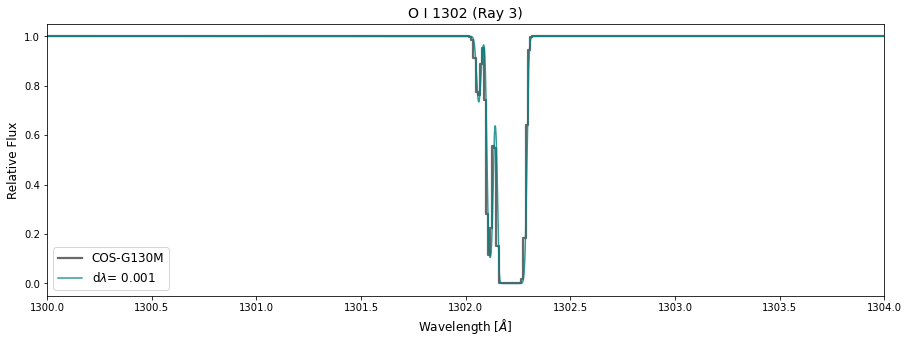

In [37]:
spec(ray3, 1300, 1304, line='O I 1302', ins='COS-G130M', num='3', col='teal')

# O II 834

yt : [INFO     ] 2022-07-11 00:04:33,099 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:33,102 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:33,105 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:33,121 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 2570.02it/s]
yt : [INFO     ] 2022-07-11 00:04:33,411 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:33,438 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:33,467 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 10548.91it/s]
yt : [INFO     ] 2022-07-11 00:04:33,493 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 10319.68it/s]
yt : [INFO     ] 2022-07-11 00:04:33,520 7

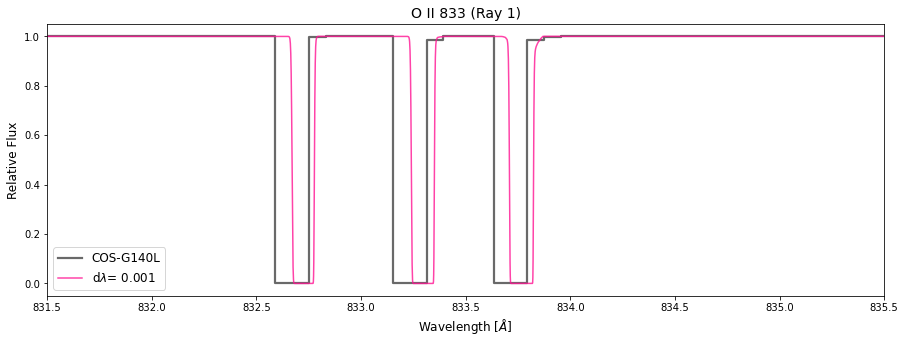

In [38]:
spec(ray1, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='1')

yt : [INFO     ] 2022-07-11 00:04:33,695 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:33,698 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:33,701 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:33,704 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 7862.44it/s]
yt : [INFO     ] 2022-07-11 00:04:33,825 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:33,853 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:33,884 21 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 19318.16it/s]
yt : [INFO     ] 2022-07-11 00:04:33,899 21 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 19420.53it/s]
yt : [INFO     ] 2022-07-11 00:04:33,914 2

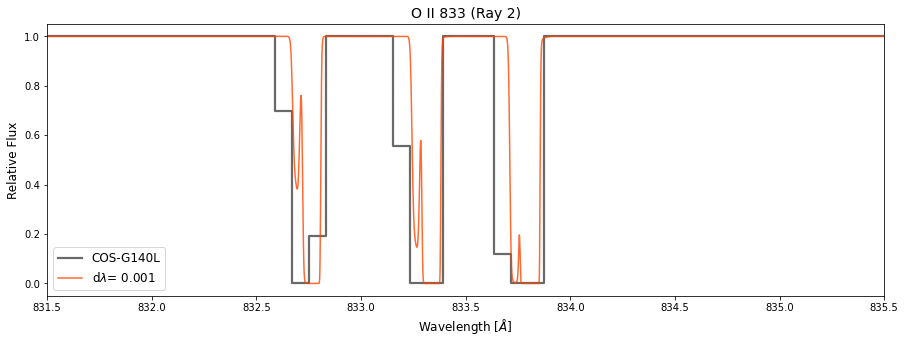

In [39]:
spec(ray2, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:34,077 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,080 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,084 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:34,088 Creating spectrum
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 4080.08it/s]
yt : [INFO     ] 2022-07-11 00:04:34,286 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:34,312 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:34,341 47 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 14793.50it/s]
yt : [INFO     ] 2022-07-11 00:04:34,360 47 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 15345.09it/s]
yt : [INFO     ] 2022-07-11 00:04:34,378 4

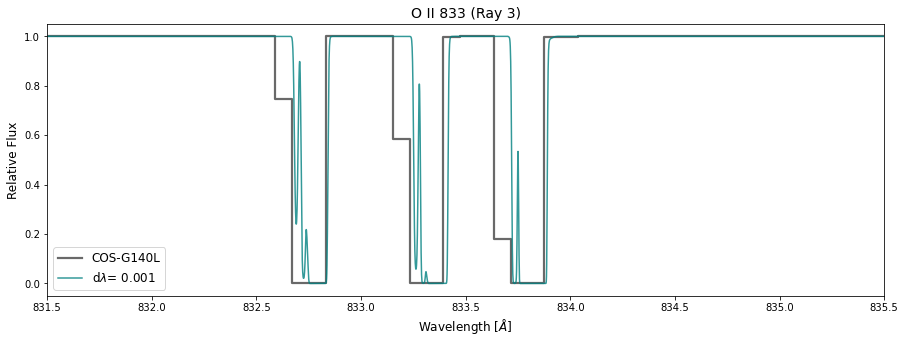

In [40]:
spec(ray3, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='3', col='teal')

# Al II 1670

yt : [INFO     ] 2022-07-11 00:04:34,537 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,541 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,544 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:34,574 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2657.53it/s]
yt : [INFO     ] 2022-07-11 00:04:34,702 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:34,728 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 6052.18it/s]
yt : [INFO     ] 2022-07-11 00:04:34,801 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

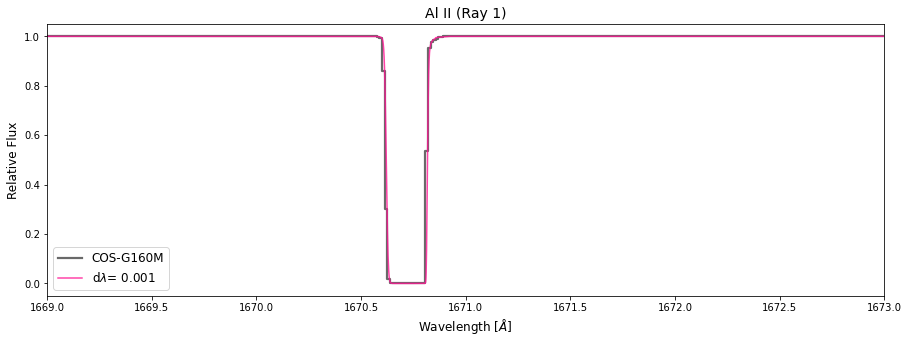

In [41]:
spec(ray1, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-07-11 00:04:34,942 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,945 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:34,948 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:34,951 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9725.31it/s]
yt : [INFO     ] 2022-07-11 00:04:35,008 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:35,036 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 14751.02it/s]
yt : [INFO     ] 2022-07-11 00:04:35,084 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

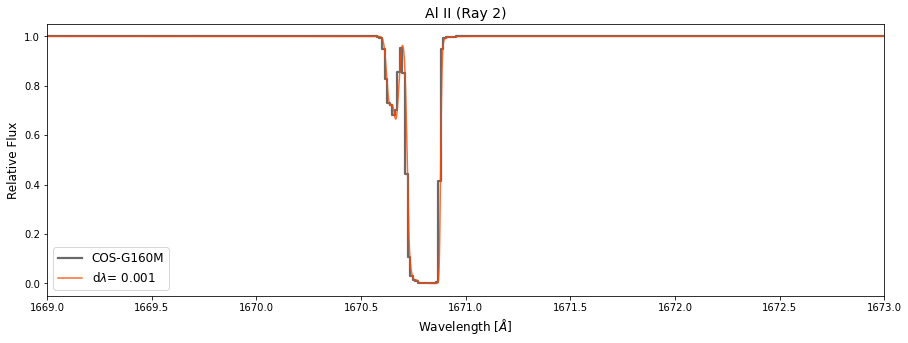

In [42]:
spec(ray2, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-07-11 00:04:35,238 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,242 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,246 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9328.13it/s]
yt : [INFO     ] 2022-07-11 00:04:35,307 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:35,315 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 15718.89it/s]
yt : [INFO     ] 2022-07-11 00:04:35,362 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


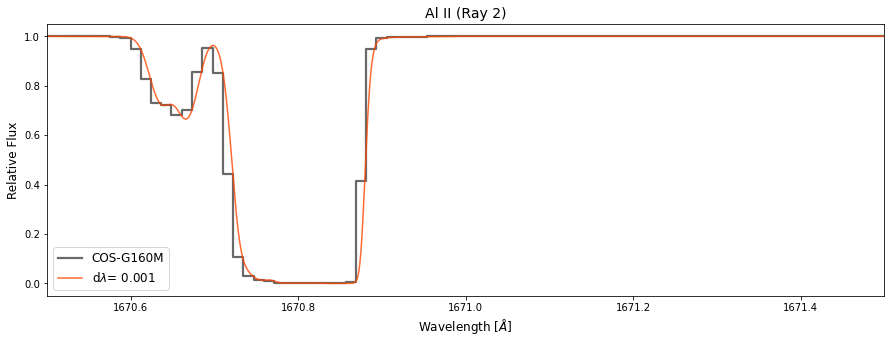

In [43]:
spec(ray2, 1670.5, 1671.5, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-07-11 00:04:35,490 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,494 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,563 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:35,565 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4560.67it/s]
yt : [INFO     ] 2022-07-11 00:04:35,654 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:35,680 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8761.38it/s]
yt : [INFO     ] 2022-07-11 00:04:35,738 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

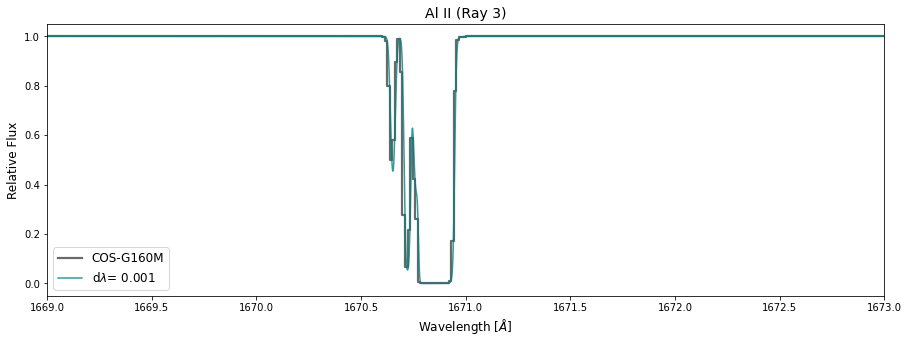

In [44]:
spec(ray3, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='3',col='teal')

# Al III 1854

yt : [INFO     ] 2022-07-11 00:04:35,879 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,882 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:35,885 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:35,905 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3543.34it/s]
yt : [INFO     ] 2022-07-11 00:04:36,006 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:36,034 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:36,066 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8055.62it/s]
yt : [INFO     ] 2022-07-11 00:04:36,099 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

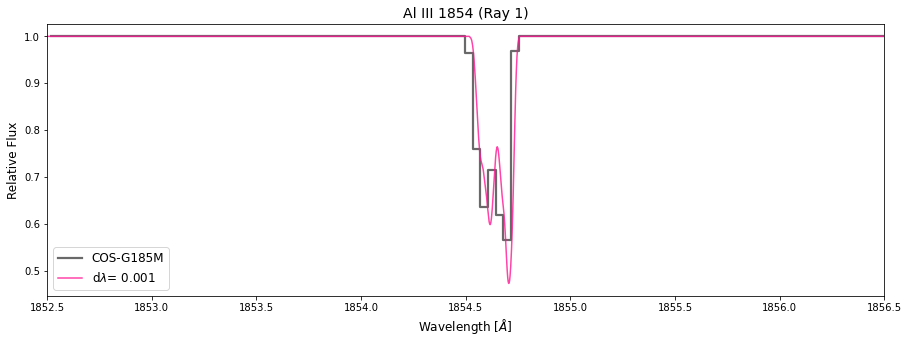

In [45]:
spec(ray1, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='1')

yt : [INFO     ] 2022-07-11 00:04:36,252 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,255 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,258 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:36,261 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12833.98it/s]
yt : [INFO     ] 2022-07-11 00:04:36,313 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:36,339 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:36,368 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19534.30it/s]
yt : [INFO     ] 2022-07-11 00:04:36,382 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

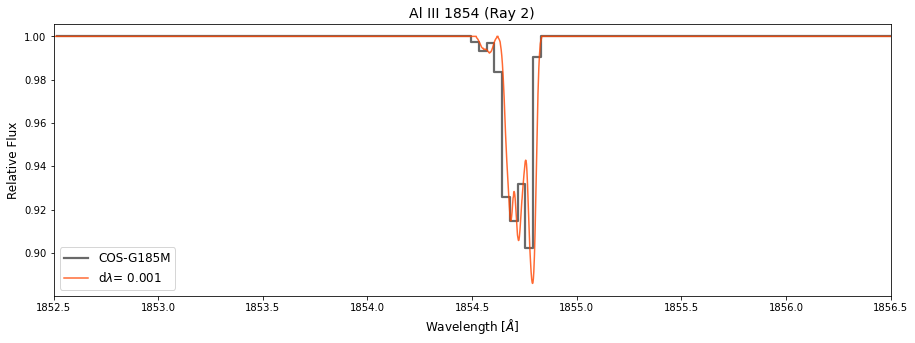

In [46]:
spec(ray2, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='2', col='orangered',
    dlam=0.001)

yt : [INFO     ] 2022-07-11 00:04:36,524 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,527 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,530 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:36,533 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6154.87it/s]
yt : [INFO     ] 2022-07-11 00:04:36,605 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:36,631 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:36,659 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13044.62it/s]
yt : [INFO     ] 2022-07-11 00:04:36,680 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

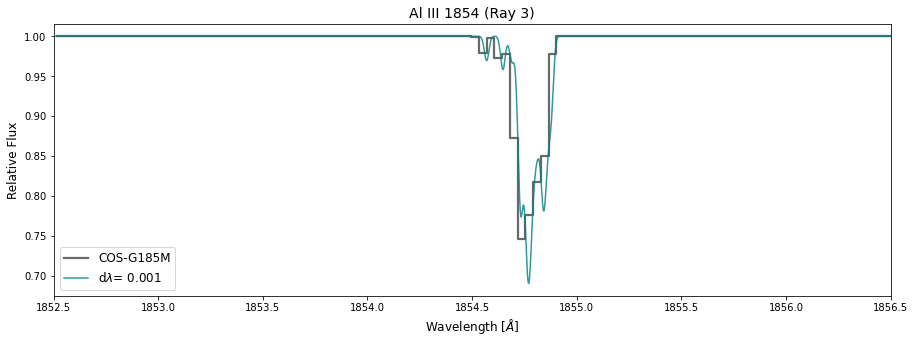

In [47]:
spec(ray3, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='3', col='teal')

# Fe II 2600

yt : [INFO     ] 2022-07-11 00:04:36,826 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,829 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:36,832 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:36,888 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2675.09it/s]
yt : [INFO     ] 2022-07-11 00:04:37,015 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:37,041 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:37,069 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7162.86it/s]
yt : [INFO     ] 2022-07-11 00:04:37,106 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

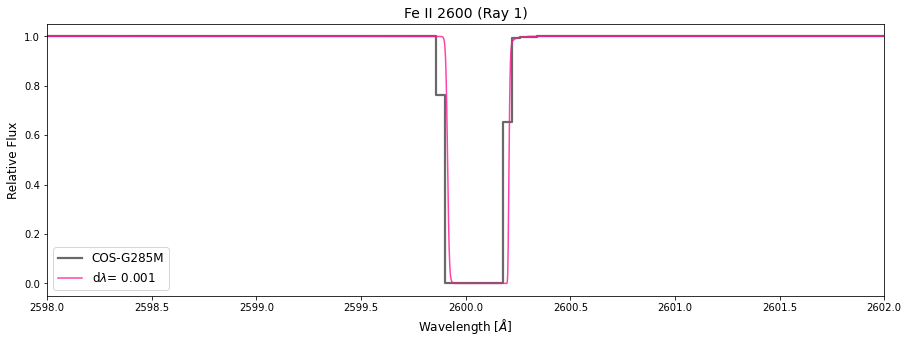

In [48]:
spec(ray1, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-07-11 00:04:37,248 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,252 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,255 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:37,259 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9081.50it/s]
yt : [INFO     ] 2022-07-11 00:04:37,320 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:37,348 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:37,380 15 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13803.44it/s]
yt : [INFO     ] 2022-07-11 00:04:37,401 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples

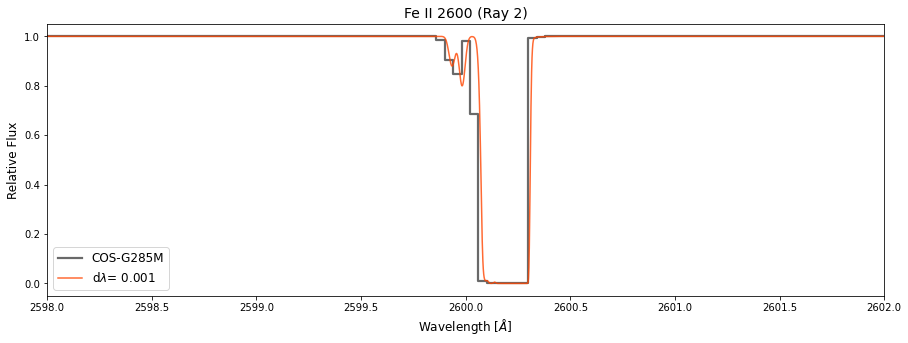

In [49]:
spec(ray2, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:37,552 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,555 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,558 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:37,561 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4693.63it/s]
yt : [INFO     ] 2022-07-11 00:04:37,647 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:37,674 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:37,705 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10344.23it/s]
yt : [INFO     ] 2022-07-11 00:04:37,732 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples

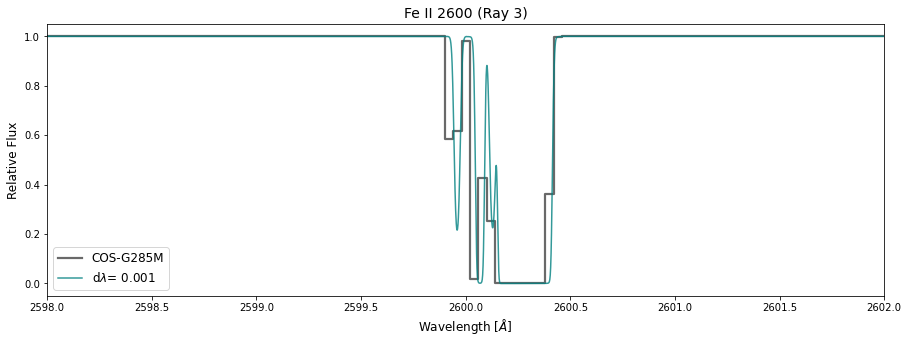

In [50]:
spec(ray3, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')

# Fe III 1122

yt : [INFO     ] 2022-07-11 00:04:37,882 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,885 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:37,889 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:37,926 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3691.15it/s]
yt : [INFO     ] 2022-07-11 00:04:38,027 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:38,055 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:38,086 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 6449.52it/s]
yt : [INFO     ] 2022-07-11 00:04:38,127 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

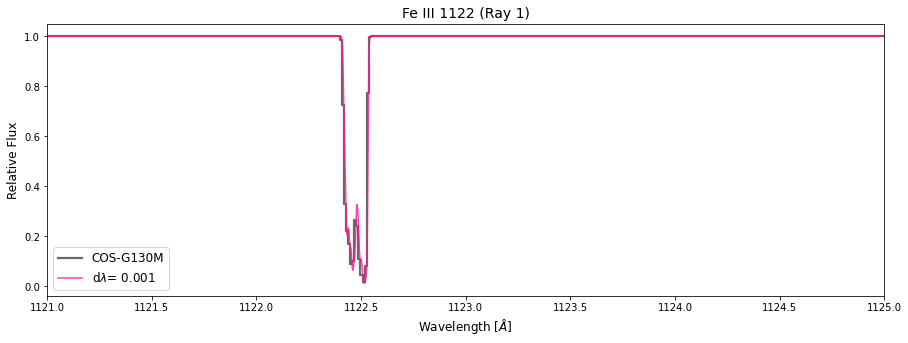

In [51]:
spec(ray1, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1')

yt : [INFO     ] 2022-07-11 00:04:38,280 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,284 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,287 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:38,289 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10851.69it/s]
yt : [INFO     ] 2022-07-11 00:04:38,345 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:38,372 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:38,400 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 15733.40it/s]
yt : [INFO     ] 2022-07-11 00:04:38,417 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

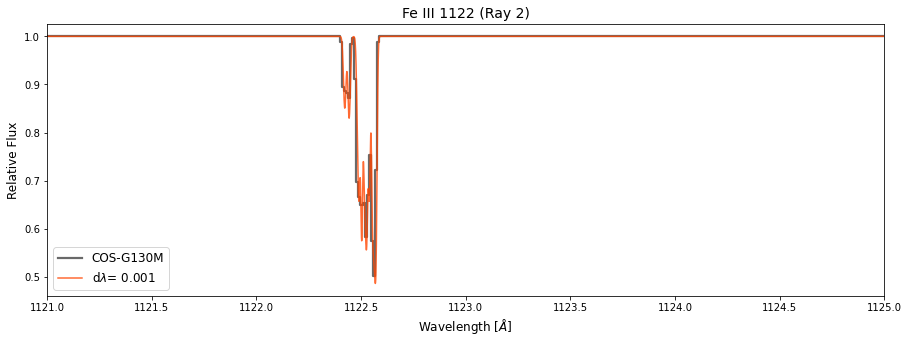

In [52]:
spec(ray2, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:38,560 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,564 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,567 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11093.75it/s]
yt : [INFO     ] 2022-07-11 00:04:38,619 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:38,627 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:38,656 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 14627.84it/s]
yt : [INFO     ] 2022-07-11 00:04:38,675 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

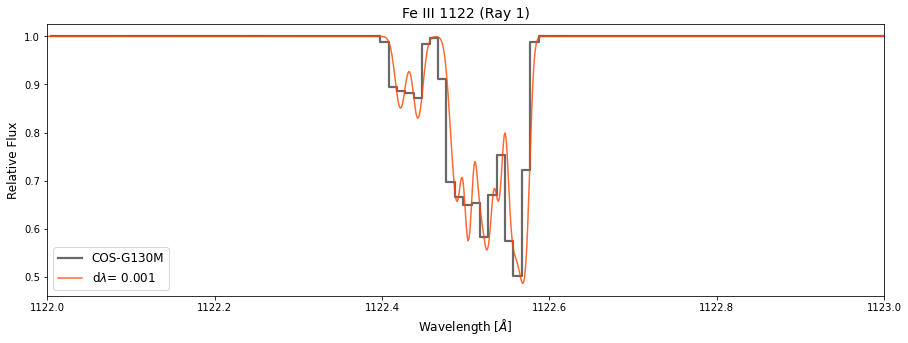

In [53]:
spec(ray2, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:38,803 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,806 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:38,810 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:38,813 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5711.00it/s]
yt : [INFO     ] 2022-07-11 00:04:38,891 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:38,918 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:38,950 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9603.87it/s]
yt : [INFO     ] 2022-07-11 00:04:38,978 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

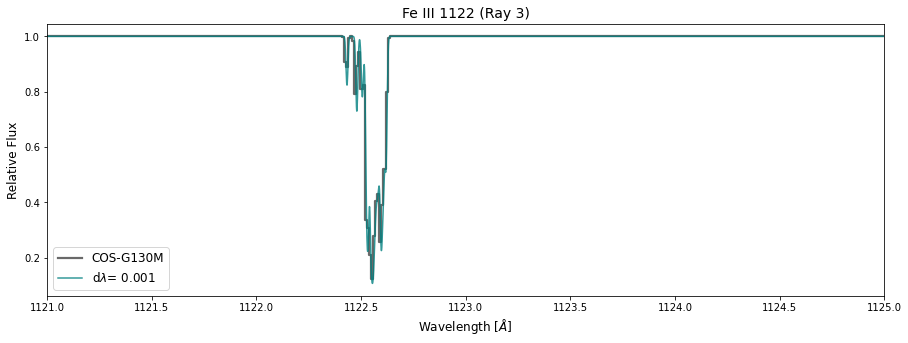

In [54]:
spec(ray3, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

yt : [INFO     ] 2022-07-11 00:04:39,130 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,134 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,137 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5902.57it/s]
yt : [INFO     ] 2022-07-11 00:04:39,210 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:39,218 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:39,247 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9666.64it/s]
yt : [INFO     ] 2022-07-11 00:04:39,275 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

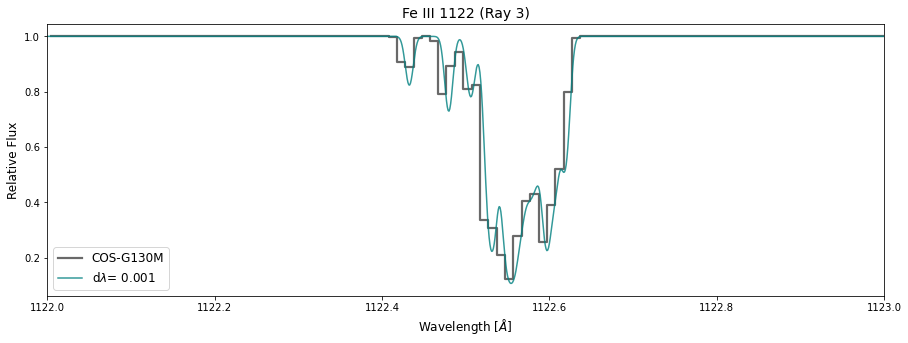

In [55]:
spec(ray3, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

# Mg II 2796

yt : [INFO     ] 2022-07-11 00:04:39,397 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,400 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,403 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:39,432 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1884.42it/s]
yt : [INFO     ] 2022-07-11 00:04:39,598 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:39,624 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:39,654 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5527.37it/s]
yt : [INFO     ] 2022-07-11 00:04:39,701 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

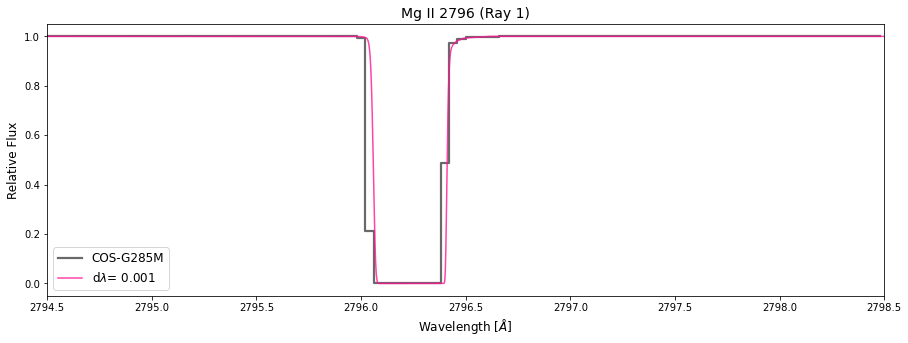

In [56]:
spec(ray1, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-07-11 00:04:39,846 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,850 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:39,853 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:39,856 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7005.42it/s]
yt : [INFO     ] 2022-07-11 00:04:39,925 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:39,951 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:39,985 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14115.74it/s]
yt : [INFO     ] 2022-07-11 00:04:40,005 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples

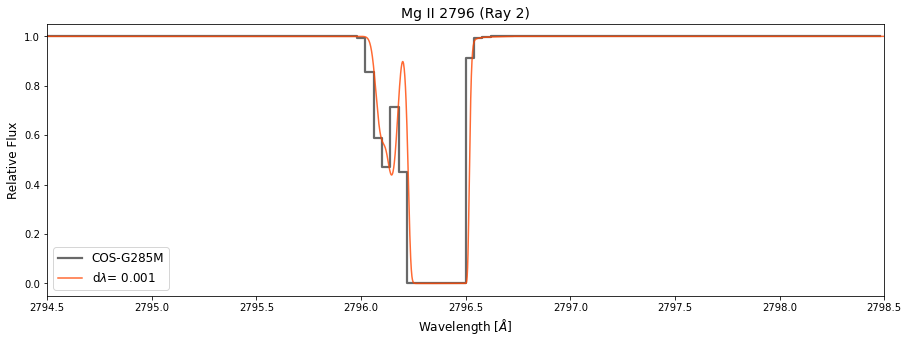

In [57]:
spec(ray2, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-07-11 00:04:40,154 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:40,158 Setting instrument to Custom
yt : [INFO     ] 2022-07-11 00:04:40,161 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-07-11 00:04:40,163 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3560.31it/s]
yt : [INFO     ] 2022-07-11 00:04:40,266 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-07-11 00:04:40,292 Creating spectrum
yt : [INFO     ] 2022-07-11 00:04:40,319 41 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8883.30it/s]
yt : [INFO     ] 2022-07-11 00:04:40,349 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-d17aacb86f25>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

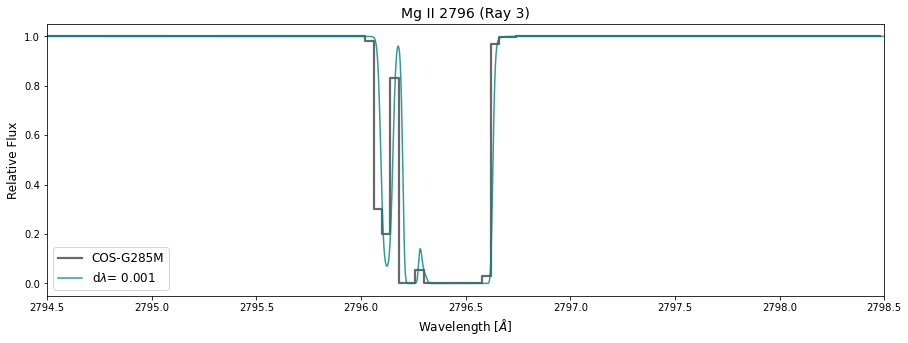

In [58]:
spec(ray3, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')